In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import os

In [2]:
columns = ('appId', 'name')
df_games_names = pd.concat([pd.read_csv('page{}_games.csv'.format(i), usecols=[1, 2], names=columns) for i in range(1, 6)])

df_games_names

,appId,name
0,271590,Grand Theft Auto V
1,1174180,Red Dead Redemption 2
2,1145360,Hades
3,715950,Divinity: Original Sin 2
4,391540,Undertale
...,...,...
11,1237970,Titanfall 2
12,584400,Sonic Mania
13,268500,XCOM 2
14,412830,STEINS;GATE


In [3]:
columns = ('appId', 'user', 'rating', 'hours')
df_reviews = pd.concat([pd.read_csv('page{}_reviews.csv'.format(i), usecols=[0, 3, 6, 7], names=columns) for i in range(1, 6)])

df_reviews

,appId,user,rating,hours
0,1145360,76561198059680994,1,48.3
1,1145360,lalaso123,1,23.2
2,1145360,76561198008088676,1,5.1
3,1145360,YogurtRed,1,11.4
4,1145360,76561199095470163,1,22.8
...,...,...,...,...
142106,809230,7.65612E+16,1,41.6
142107,809230,7.65612E+16,1,63.6
142108,809230,7.65612E+16,1,19.1
142109,809230,7.65612E+16,1,136.6


In [4]:
indexNames = df_reviews[df_reviews['user'] == '#NAME?' ].index
df_reviews.drop(indexNames , inplace=True)
df_unique_reivews = df_reviews.drop_duplicates(subset=['appId', 'user'])

In [5]:
df_unique_reivews

,appId,user,rating,hours
0,1145360,76561198059680994,1,48.3
1,1145360,lalaso123,1,23.2
2,1145360,76561198008088676,1,5.1
3,1145360,YogurtRed,1,11.4
4,1145360,76561199095470163,1,22.8
...,...,...,...,...
142071,809230,bhollowa123,1,393.7
142077,809230,MessedUpHare,1,3.4
142079,809230,milkmouf,-1,0.9
142080,809230,Octavian1453,1,125.4


In [6]:
g = df_unique_reivews.groupby('user').agg('count')
df_unique_reivews = df_unique_reivews[df_unique_reivews['user'].isin(g[g['rating'] > 1].index)]

In [7]:
g[g['rating'] > 1]

,appId,rating,hours
user,,,
----Werewolf---,3,3,3
--Legion--,2,2,2
--SaiyajiN,2,2,2
--Ulrich--,2,2,2
--depresso--,2,2,2
...,...,...,...
zzzwhiteboyzzz,2,2,2
zzzxggg,2,2,2
zzzzzzzzzx_x,3,3,3


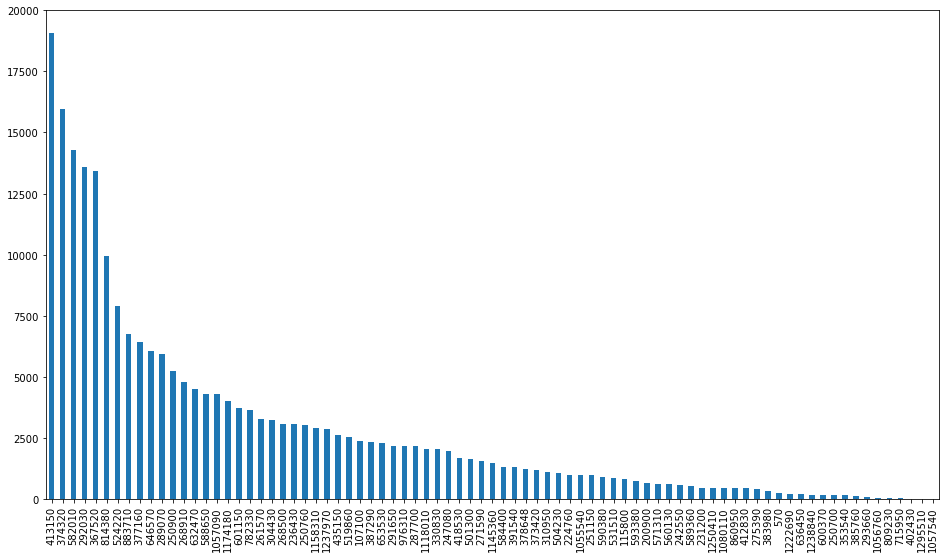

In [8]:
df_unique_reivews.appId.value_counts().plot(kind='bar', figsize=(16,9))

In [9]:
df_unique_reivews.appId.value_counts().describe()

count       81.000000
mean      2813.049383
std       3820.613138
min         21.000000
25%        468.000000
50%       1492.000000
75%       3252.000000
max      19060.000000
Name: appId, dtype: float64

In [10]:
df_games_users = df_unique_reivews.pivot(
    index='appId',
    columns='user',
    values='rating'
).fillna(0)

df_games_users

user,----Werewolf---,--Legion--,--SaiyajiN,--Ulrich--,--depresso--,--infinite,-5k,-76561198091459618-,-Azsael-,-B-l-a-n-k-,...,zyzamo,zzayn,zzfuzzy,zzzeli,zzzkentucky,zzzwhiteboyzzz,zzzxggg,zzzzzzzzzx_x,zzzzzzzzzzz111,zzzzzzzzzzzzzzzzzzz12
appId,,,,,,,,,,,,,,,,,,,,,
570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1237970,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1238840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
hashmap = {appId: i for i, appId in enumerate(list(df_games_users.index))}

In [12]:
from scipy.sparse import csr_matrix

sparse_mat_games_users = csr_matrix(df_games_users.values)

In [13]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

model.fit(sparse_mat_games_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [14]:
distances, indices = model.kneighbors(
            sparse_mat_games_users[hashmap[271590]],
            n_neighbors=10+1)

In [15]:
raw_recommends = \
            sorted(
                list(
                    zip(
                        indices.squeeze().tolist(),
                        distances.squeeze().tolist()
                    )
                ),
                key=lambda x: x[1]
            )[1:]

In [16]:
reverse_hashmap = {v: k for k, v in hashmap.items()}
print('Recommendations for {}:'.format(271590))
for i, (idx, dist) in enumerate(raw_recommends):
    print('{}: {}, distance of {}'.format(i+1, df_games_names[df_games_names['appId'] == reverse_hashmap[idx]].iloc[0].at['name'], dist))

Recommendations for 271590:
1: Red Dead Redemption 2, distance of 0.9351986728552301
2: The Witcher 3: Wild Hunt, distance of 0.9594370546067209
3: DOOM Eternal, distance of 0.9699064391311172
4: F1 2020, distance of 0.9741188649659339
5: Fallout 4, distance of 0.9750941171353307
6: Stardew Valley, distance of 0.9758234621534126
7: Metal Gear Solid V: The Phantom Pain, distance of 0.9766049915902965
8: Microsoft Flight Simulator, distance of 0.9801295537552608
9: Sid Meier’s Civilization® VI, distance of 0.980616771639832
10: Cuphead, distance of 0.9813921794817589
